In [95]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [96]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [97]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [98]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [80]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [81]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4636927cdcc9c1553cd45838b21f1205


In [82]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [83]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | comodoro rivadavia
Processing Record 2 of Set 13 | ushuaia
Processing Record 3 of Set 13 | hobart
Processing Record 4 of Set 13 | busselton
Processing Record 5 of Set 13 | rikitea
Processing Record 6 of Set 13 | albany
Processing Record 7 of Set 13 | capitao poco
Processing Record 8 of Set 13 | puerto ayora
Processing Record 9 of Set 13 | punta arenas
Processing Record 10 of Set 13 | barrow
Processing Record 11 of Set 13 | cape town
Processing Record 12 of Set 13 | mitsamiouli
Processing Record 13 of Set 13 | hambantota
Processing Record 14 of Set 13 | isangel
Processing Record 15 of Set 13 | provideniya
Processing Record 16 of Set 13 | yasnogorsk
Processing Record 17 of Set 13 | redcar
Processing Record 18 of Set 13 | chicama
Processing Record 19 of Set 13 | sinnamary
Processing Record 20 of Set 13 | lokosovo
Processing Record 21 of Set 13 | broome
Processing Record 22 of Set 13 | mataura
Processing Record 23 of Set 13 | dikson
Processing Record 24 of S

Processing Record 38 of Set 16 | lolua
City not found. Skipping...
Processing Record 39 of Set 16 | tsihombe
City not found. Skipping...
Processing Record 40 of Set 16 | zhigansk
Processing Record 41 of Set 16 | severo-kurilsk
Processing Record 42 of Set 16 | mezen
Processing Record 43 of Set 16 | bam
Processing Record 44 of Set 16 | haines junction
Processing Record 45 of Set 16 | saldanha
Processing Record 46 of Set 16 | asyut
Processing Record 47 of Set 16 | kathmandu
Processing Record 48 of Set 16 | sao joao da barra
Processing Record 49 of Set 16 | mehriz
Processing Record 50 of Set 16 | vardo
Processing Record 1 of Set 17 | baykit
Processing Record 2 of Set 17 | kalmar
Processing Record 3 of Set 17 | yakeshi
Processing Record 4 of Set 17 | nicoya
Processing Record 5 of Set 17 | quibdo
Processing Record 6 of Set 17 | tagusao
Processing Record 7 of Set 17 | marrakesh
Processing Record 8 of Set 17 | neiafu
Processing Record 9 of Set 17 | chuy
Processing Record 10 of Set 17 | torbay


Processing Record 23 of Set 20 | saint-pierre
Processing Record 24 of Set 20 | petropavlovsk-kamchatskiy
Processing Record 25 of Set 20 | harwich
Processing Record 26 of Set 20 | north platte
Processing Record 27 of Set 20 | padang
Processing Record 28 of Set 20 | ca mau
Processing Record 29 of Set 20 | mbuji-mayi
Processing Record 30 of Set 20 | pangnirtung
Processing Record 31 of Set 20 | ambulu
Processing Record 32 of Set 20 | mehamn
Processing Record 33 of Set 20 | alakurtti
Processing Record 34 of Set 20 | sterling
Processing Record 35 of Set 20 | faya
Processing Record 36 of Set 20 | ithaca
Processing Record 37 of Set 20 | vianopolis
Processing Record 38 of Set 20 | sapele
Processing Record 39 of Set 20 | beisfjord
Processing Record 40 of Set 20 | borba
Processing Record 41 of Set 20 | fortuna
Processing Record 42 of Set 20 | nishihara
Processing Record 43 of Set 20 | irbeyskoye
Processing Record 44 of Set 20 | venancio aires
Processing Record 45 of Set 20 | lipovtsy
Processing R

Processing Record 11 of Set 24 | thunder bay
Processing Record 12 of Set 24 | muskogee
Processing Record 13 of Set 24 | virginia beach
Processing Record 14 of Set 24 | santa fe
Processing Record 15 of Set 24 | malyn
Processing Record 16 of Set 24 | galle
Processing Record 17 of Set 24 | totness
Processing Record 18 of Set 24 | monopoli
Processing Record 19 of Set 24 | cedar city
Processing Record 20 of Set 24 | lasa
Processing Record 21 of Set 24 | saint george
Processing Record 22 of Set 24 | sao miguel do araguaia
Processing Record 23 of Set 24 | mega
Processing Record 24 of Set 24 | kyra
Processing Record 25 of Set 24 | kindu
Processing Record 26 of Set 24 | luwuk
Processing Record 27 of Set 24 | dvinskoy
Processing Record 28 of Set 24 | margate
Processing Record 29 of Set 24 | smithers
Processing Record 30 of Set 24 | sistranda
Processing Record 31 of Set 24 | acala
Processing Record 32 of Set 24 | dawei
Processing Record 33 of Set 24 | yarkovo
Processing Record 34 of Set 24 | prog

In [84]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Comodoro Rivadavia,-45.87,-67.50,64.40,20,40,25.28,AR,2020-10-27 18:07:25
1,Ushuaia,-54.80,-68.30,46.40,45,40,18.34,AR,2020-10-27 18:05:16
2,Hobart,-42.88,147.33,48.20,93,40,3.31,AU,2020-10-27 18:06:19
3,Busselton,-33.65,115.33,60.01,74,62,10.40,AU,2020-10-27 18:07:26
4,Rikitea,-23.12,-134.97,75.18,85,63,16.49,PF,2020-10-27 18:07:26
5,Albany,42.60,-73.97,52.00,58,87,1.01,US,2020-10-27 18:07:03
6,Capitao Poco,-1.75,-47.06,94.59,41,46,8.68,BR,2020-10-27 18:07:26
7,Puerto Ayora,-0.74,-90.35,73.40,78,75,16.11,EC,2020-10-27 18:07:26
8,Punta Arenas,-53.15,-70.92,50.00,39,40,21.92,CL,2020-10-27 18:03:47
9,Barrow,71.29,-156.79,30.20,80,90,13.87,US,2020-10-27 18:02:43


In [99]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Comodoro Rivadavia,AR,2020-10-27 18:07:25,-45.87,-67.50,64.40,20,40,25.28
1,Ushuaia,AR,2020-10-27 18:05:16,-54.80,-68.30,46.40,45,40,18.34
2,Hobart,AU,2020-10-27 18:06:19,-42.88,147.33,48.20,93,40,3.31
3,Busselton,AU,2020-10-27 18:07:26,-33.65,115.33,60.01,74,62,10.40
4,Rikitea,PF,2020-10-27 18:07:26,-23.12,-134.97,75.18,85,63,16.49
...,...,...,...,...,...,...,...,...,...
574,Touros,BR,2020-10-27 18:08:50,-5.20,-35.46,86.00,58,40,13.87
575,Zhangjiakou,CN,2020-10-27 18:08:50,40.81,114.88,39.02,53,99,3.33
576,Falavarjan,IR,2020-10-27 18:08:51,32.56,51.51,59.00,19,0,6.93
577,Port Macquarie,AU,2020-10-27 18:08:51,-31.43,152.92,57.99,97,88,6.89


In [100]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [101]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [102]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1603822878.2850997

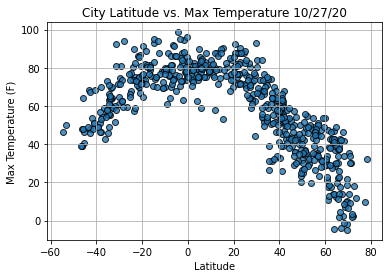

In [103]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

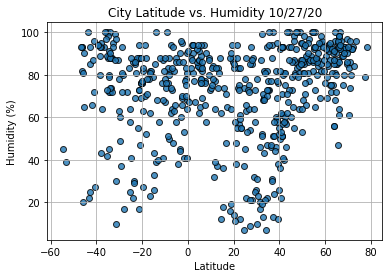

In [104]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

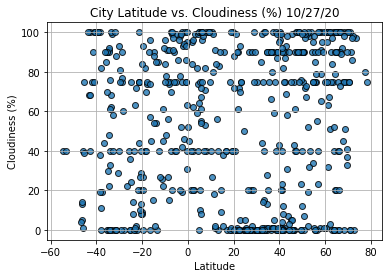

In [105]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

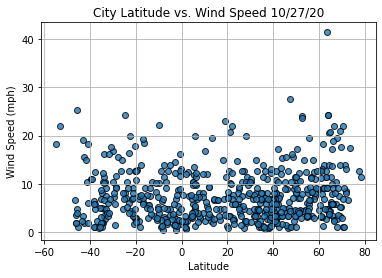

In [106]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [107]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [108]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

SyntaxError: unexpected EOF while parsing (<ipython-input-108-d58af2435033>, line 3)

In [109]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [112]:
index13 = city_data_df.loc[13]

In [113]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

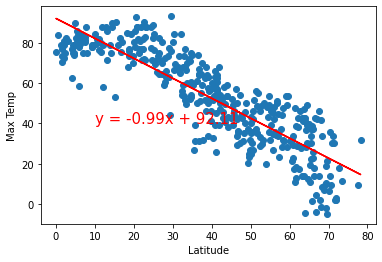

In [115]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

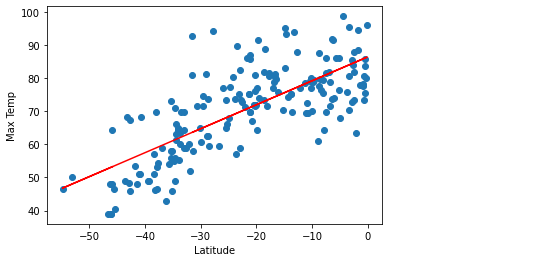

In [117]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

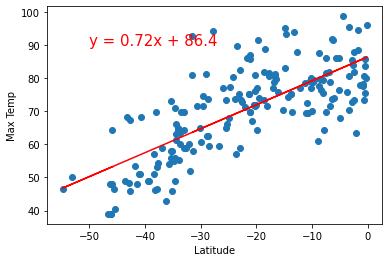

In [119]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

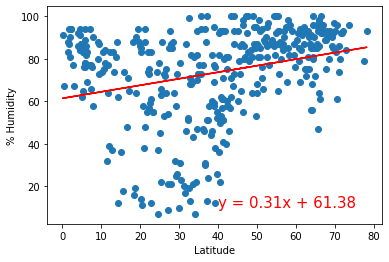

In [131]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

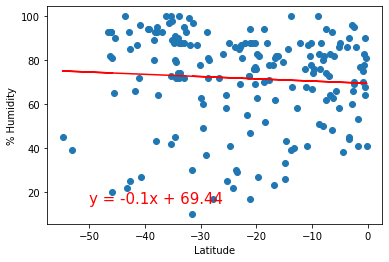

In [133]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

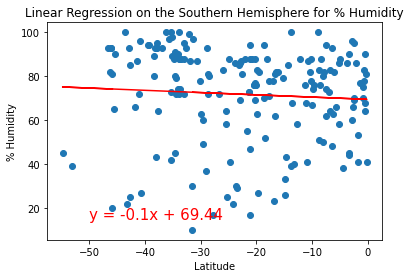

In [137]:
# Linear regression on the Southern Hemisphere
plt.title(f"Linear Regression on the Southern Hemisphere for % Humidity")
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

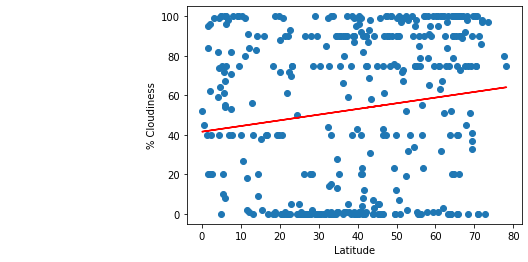

In [127]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(-50,15))


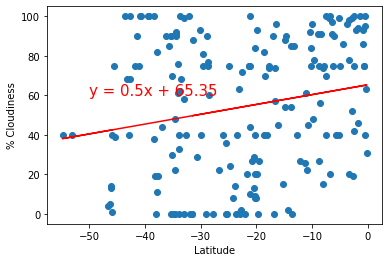

In [139]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

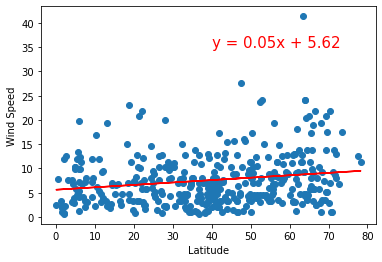

In [143]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

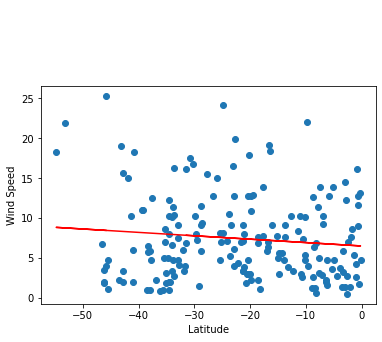

In [144]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))